# Adaline Gradient Descent Application

## call data

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                'iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## iris data example

In [2]:
import os
os.chdir('C:/Users/이태호/주피터 노트북/KMOOC-ML')

import joy

X, y = joy.iris_data()
ada = joy.AdalineGD(epochs=10, eta=0.1)
ada.fit(X, y)
joy.plot_xyw(X, y, title='iris data', classes=['setosa','versicolor'])

## check cost value

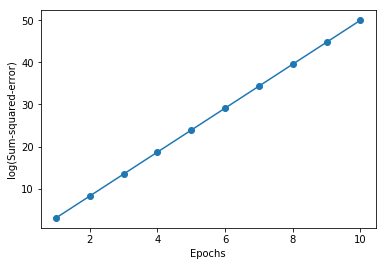

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X, y = joy.iris_data()
ada1 = joy.AdalineGD(epochs=10, eta=0.1).fit(X,y)
plt.plot(range(1, len(ada1.cost_) +1), np.log10(ada1.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.show()

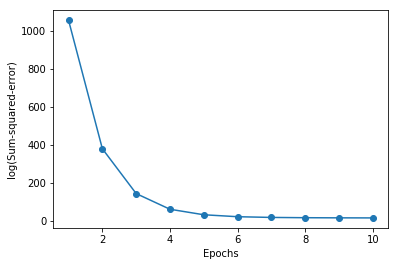

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

X, y = joy.iris_data()
ada2 = joy.AdalineGD(epochs=10, eta=0.0001).fit(X,y)
plt.plot(range(1, len(ada2.cost_) +1), ada2.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.show()

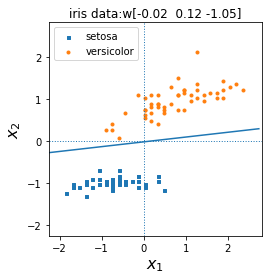

In [5]:
import joy
Xstd, y = joy.iris_data(standardized=True)
ada = joy.AdalineGD(epochs=100, eta=0.001)
ada.fit(Xstd, y)
joy.plot_xyw(Xstd, y, ada.w, title='iris data', classes=['setosa','versicolor'])


## Momentum

In [6]:
class AdalineGD():
    """AdAptive LInear NEuron classifier"""
    
    def __init__(self, eta=0.01, epochs=10, random_seed=1):
        self.eta = eta
        self.epochs = epochs
        self.random_seed = random_seed
    
    def net_input(self, X):
        z = np.dot(X, self.w[1:]) + self.w[0]
        return z
    
    def activation(self, X):
        return X
    
    def fit(self, X, y):
        np.random.RandomState(self.random_seed)
        # w size is increased by one for bias
        self.w = np.random.random(size=X.shape[1]+1)
        
        self.maxy, self.miny = y.max(), y.min()
        self.cost_ = []  # Loss(cost) of each epochs
        self.w_ = np.array([self.w])  # Weight of each epochs
        
        """Momentum"""
        self.v1 = np.zeros_like(self.w[1:])
        self.v2 = np.zeros_like(self.w[0])
        gamma = 0.5
        
        for i in range(self.epochs): # Different with perceptron
            Z = self.net_input(X)
            yhat = self.activation(Z)
            errors = (y - yhat)
            
            self.v1 = gamma*self.v1 + self.eta*np.dot(errors, X)
            self.v2 = gamma*self.v2 + self.eta*np.sum(errors)
            
            self.w[1:] += self.v1
            self.w[0]  += self.v2
            
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
            self.w_ = np.vstack([self.w_, self.w])
        return self
    
    def predict(self, X):
        mid = (self.maxy + self.miny) / 2
        Z = self.net_input(X)
        yhat = self.activation(Z)
        return np.where(yhat > mid, self.maxy, self.miny)

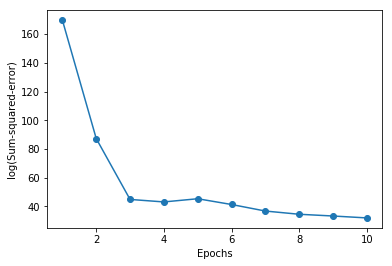

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

X, y = joy.iris_data()
ada3 = AdalineGD(epochs=10, eta=0.0001).fit(X,y)
plt.plot(range(1, len(ada3.cost_) +1), ada3.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.show()